# importing all necessary libraries for our model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle
import joblib

# opening \ reading the required dataset

In [2]:
housing=pd.read_csv('housing.csv')

# checking the data and details of dataset

In [3]:
housing.head(60)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

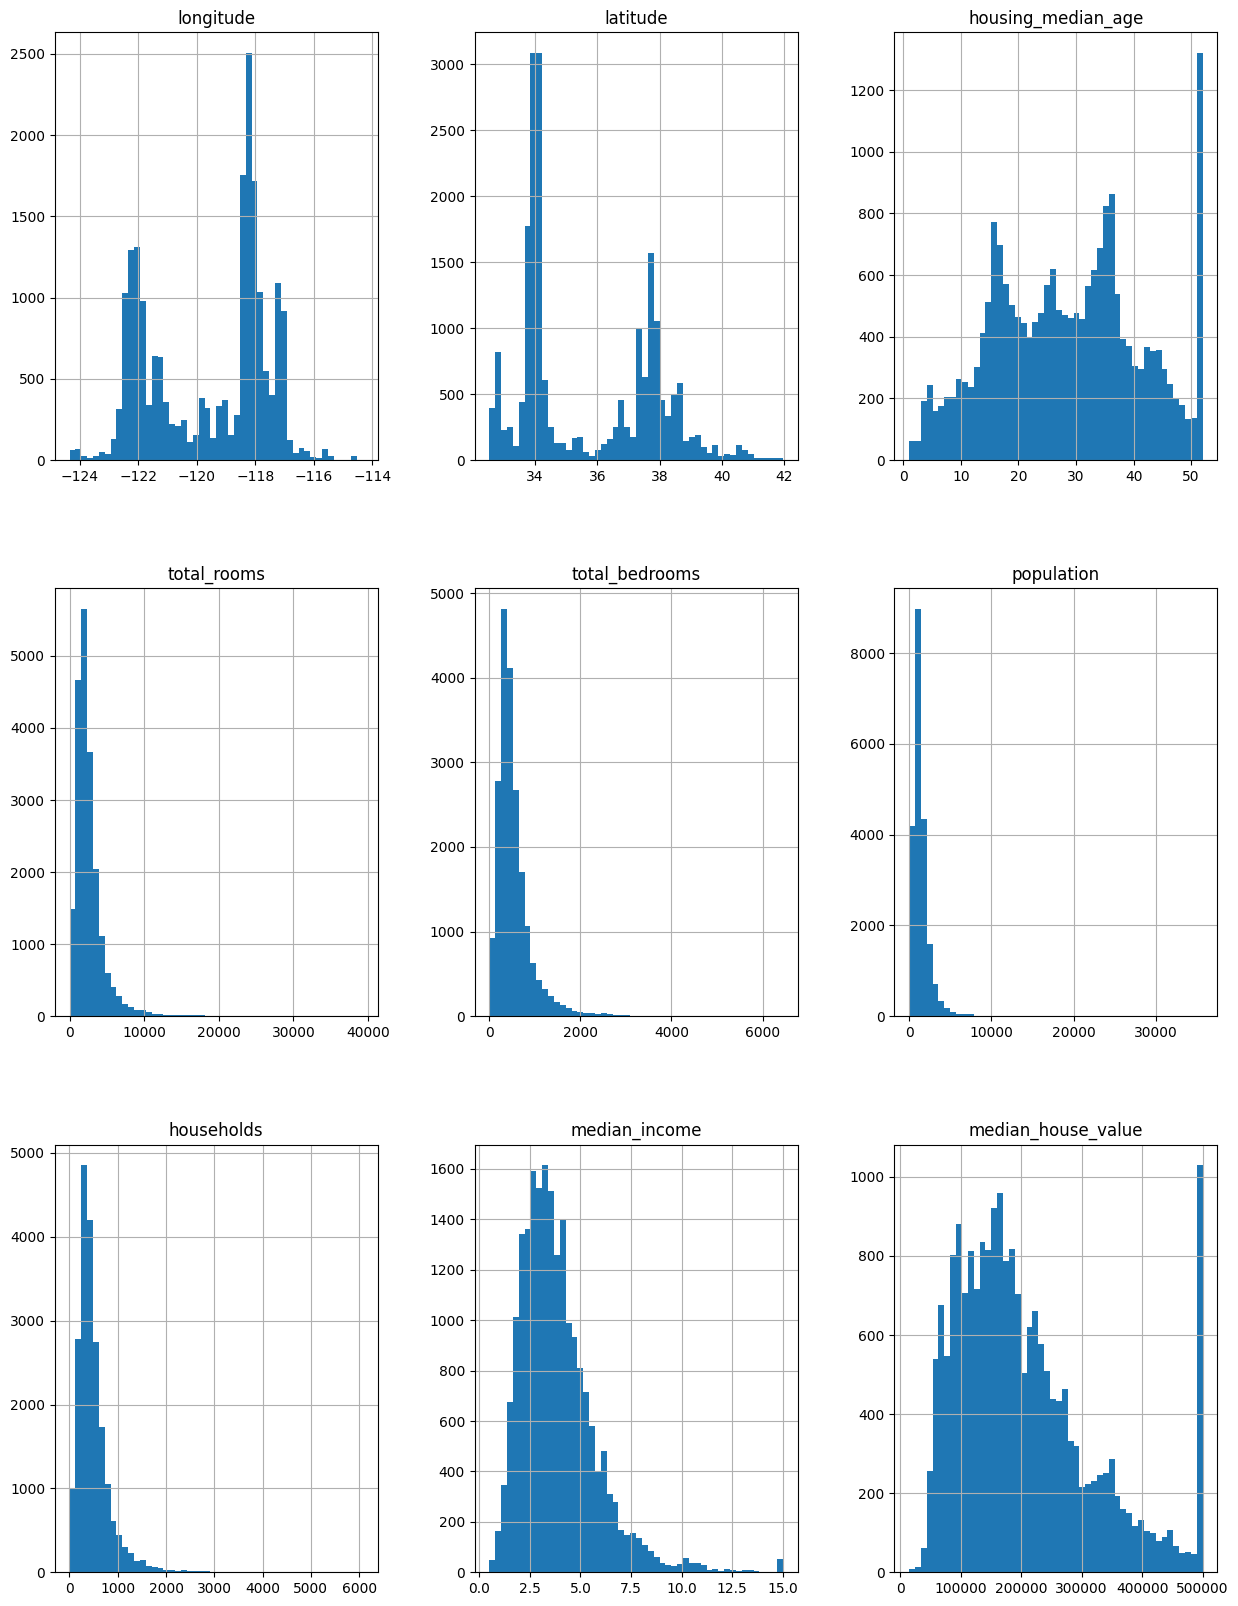

In [7]:
housing.hist(bins=50,figsize=(15,20))

# adding a column to split the dataset into stratified_test_set

In [8]:
housing["income_cat"]=pd.cut(housing['median_income'],
                             bins=[0,1.5,3,4.5,6,np.inf],
                            labels=(1,2,3,4,5))

<Axes: >

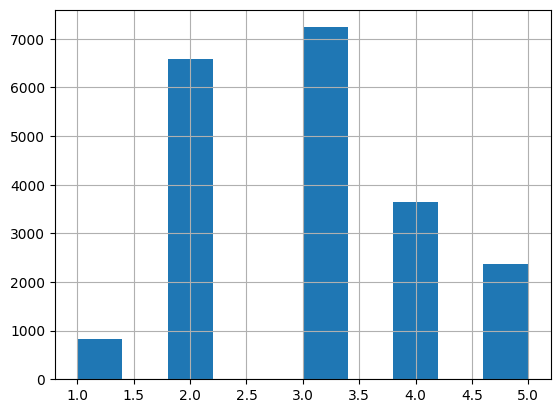

In [9]:
housing["income_cat"].hist()

# splitting the dataset into training_set and test_set

In [10]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [11]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [12]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [13]:
strat_test_set['income_cat'].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

# accessing single record in dataset

In [14]:
housing.loc[(housing["total_bedrooms"]==1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
16171,-122.5,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY,5


# removing the income_cat column from our dataset

In [15]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True) 

# creating a copy of training set

In [16]:
housing=strat_train_set.copy()

# visualizing the data to gain insight

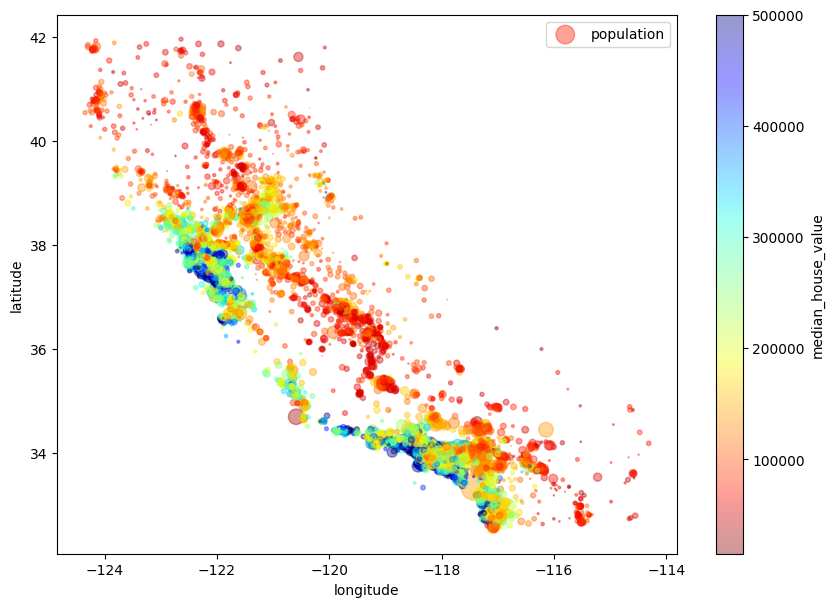

In [17]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet_r"), colorbar=True,
            )
plt.legend()

# checking the correlation in our dataset 

In [18]:
corr_matrix=housing.corr()

C:\Users\prachi\AppData\Local\Temp\ipykernel_2388\4692807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


In [19]:
corr_matrix['median_house_value'].sort_values(ascending=False)    # correlation between median_house_value and median_income

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

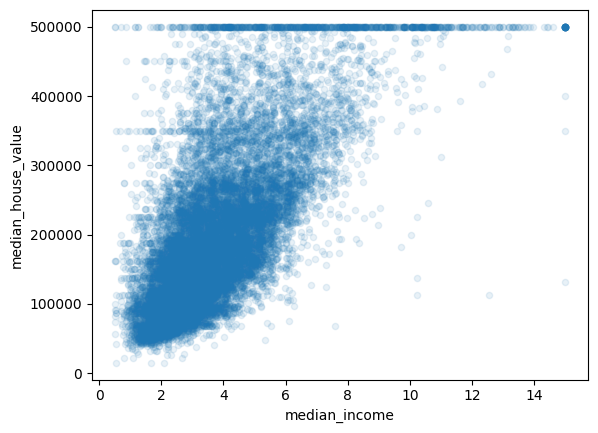

In [20]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [21]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\prachi\AppData\Local\Temp\ipykernel_2388\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [23]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# data cleaning

### cleaning numerical values 

In [24]:
imputer = SimpleImputer(strategy='median') # selecting the stratergy we want to apply, where values are empty

In [25]:
housing_num=housing.drop("ocean_proximity",axis=1) # removing non-numeric attributes

In [26]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


# second method to fill the values with median{

In [27]:
#housing_num_cleaned=housing_num.fillna(housing_num.median())
#housing_num_cleaned.info()

# } completed

In [28]:
imputer.fit(housing_num) # fitting the median value in a dataset containing all numeric values 

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_ # computed median values of all attributes are stored in a seperate variable called statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
housing_num.info() # values are not fitted yet just has been computed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [31]:
x = imputer.transform(housing_num) # stored in array format

In [32]:
housing_tr = pd.DataFrame(x,columns=housing_num.columns) # now all values are filled 

In [33]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [34]:
housing_cat=housing[["ocean_proximity"]] #extracting text data from database and storing it into housing_cat

In [35]:
housing_cat.head(5)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [36]:
ordinal_encoder=OrdinalEncoder() # ordinal encoder is used to convert all text data into numerical data (most ml algo prefer to work in numerical data)

In [37]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) # used to fit and transform the columns in dataset
housing_cat_encoded[:10] # used to view top 10 records from housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
ordinal_encoder.categories_ # all available categories in ocen_proximity column

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
cat_encoder = OneHotEncoder() #by using the onehotencoder we convert catagorical data into multidimensional binary vectors with each category getting its dimension 
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
housing_cat_1hot.toarray() # this is how onehotencoded values look like in array format

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# creating a custom transformer 

In [41]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
                         
                         
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [42]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [43]:
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [44]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

In [45]:
housing_prepared.tolist() #helps to see what is housing_prepared looks like

[[-0.9413504586000941,
  1.347438216815126,
  0.02756357138483158,
  0.5847774454783182,
  0.6403712747566713,
  0.7326023581928217,
  0.556286018753369,
  -0.8936472017581817,
  0.017395255354801475,
  0.006222642111402968,
  -0.12112176143791016,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0],
 [1.1717821162456232,
  -1.1924396559322872,
  -1.7220176265077816,
  1.2614666806325303,
  0.7815613248778976,
  0.5336115200296541,
  0.7213179906343863,
  1.2921680006896117,
  0.5692555390956567,
  -0.04081076979240782,
  -0.8108669566037208,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [0.2675811799641191,
  -0.12597159886707773,
  1.2204598426752498,
  -0.46977281386705017,
  -0.5451382840198321,
  -0.6746751909791298,
  -0.5244072164674863,
  -0.5254336457870785,
  -0.018024319769543485,
  -0.07537121621716976,
  -0.3382725169289391,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0],
 [1.2217379690788597,
  -1.3514743661963993,
  -0.3700685190453078,
  -0.3486515202216176,
  -0.03636724134162013,
  -0.4676171566742121,
  

In [46]:
full_pipeline #full pipeline combines all transformers using pipeline and this is how it looks like 

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

# 1. creating the linear regression model in the preprocessed data

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

# comparing predicted price vs labeled price

In [48]:
some_data=housing.iloc[:5]
some_labels=housing_labels[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("predictions",list(lin_reg.predict(some_data_prepared)))
print("labels",list(some_labels))

predictions [85657.90192014407, 305492.6073748765, 152056.46122455693, 186095.7094609436, 244550.6796608895]
labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


# calculating mean_square_error for linear_regression model

In [49]:
housing_prediction=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)
lin_rmse # the linear regression is underfitting our model, hence we try to use another model to check which models suits best

68627.87390018745

#  2. creating a decision tree model to check if it work's or not

In [50]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [51]:
housing_prediction=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_prediction)
tree_rmse=np.sqrt(tree_mse)
tree_rmse # This time model is badly overfitting the data, to evaluate the result we rather use different method which contains validation sets

0.0

# using cross-validation to evaluate the error

In [52]:
# In cross-validation we use the train_test_set() method to split the training model into smaller training sets and validation set
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [53]:
def display_scores(scores):          # function to view scores, and see the result 
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [71515.22016108 72293.6316819  68427.04617163 72135.45047218
 70873.81617824 76908.26060351 71101.82060993 72750.05758525
 68122.04387051 71878.081657  ]
Mean: 71600.5428991243
Standard deviation: 2308.5049223990945


In [54]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)  # we can clearly see that decision tree model is underfitting the data greater than the linear regression model

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666


# 3. Creating Random forest model for the data

In [55]:
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [56]:
housing_prediction=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_prediction)
forest_rmse=np.sqrt(forest_mse)

In [57]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)  # these scores looks more promising then other models

Scores: [51243.33943014 48880.53739702 46796.17159671 51707.16255981
 47305.39815406 51707.03444393 52499.20149211 49778.62899305
 48731.62441967 53918.30522824]
Mean: 50256.74037147536
Standard deviation: 2207.9539196753863


# saving the models using dump in joblib_file

In [58]:
joblib.dump(lin_reg, "linear_regression_model.pkl")
joblib.dump(tree_reg, "decision_tree_model.pkl")
joblib.dump(forest_reg, "random_forest_model.pkl")

['random_forest_model.pkl']

# loading the model using load method in joblib_file

In [59]:
lin_reg_loaded = joblib.load("linear_regression_model.pkl")
tree_reg_loaded = joblib.load("decision_tree_model.pkl")
forest_reg_loaded = joblib.load("random_forest_model.pkl")

In [60]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [61]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [63]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63972.350859321006 {'max_features': 2, 'n_estimators': 3}
55434.006965993256 {'max_features': 2, 'n_estimators': 10}
52528.87094027952 {'max_features': 2, 'n_estimators': 30}
60371.699889823954 {'max_features': 4, 'n_estimators': 3}
52937.17253005857 {'max_features': 4, 'n_estimators': 10}
50491.12405220244 {'max_features': 4, 'n_estimators': 30}
58912.747994849364 {'max_features': 6, 'n_estimators': 3}
52809.54674995291 {'max_features': 6, 'n_estimators': 10}
50298.950451869496 {'max_features': 6, 'n_estimators': 30}
59029.76282633167 {'max_features': 8, 'n_estimators': 3}
51840.313843370706 {'max_features': 8, 'n_estimators': 10}
50097.25403569879 {'max_features': 8, 'n_estimators': 30}
62119.07037477389 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53720.685378623246 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60512.46653257958 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52686.52693868699 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [64]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.19160174e-02, 5.99751103e-02, 4.34270638e-02, 1.48317431e-02,
       1.42071940e-02, 1.49817988e-02, 1.40076903e-02, 3.74850043e-01,
       4.74000590e-02, 1.11219390e-01, 6.83061133e-02, 1.69364211e-02,
       1.40434711e-01, 6.32176740e-05, 3.49939244e-03, 3.94403408e-03])

In [65]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.374850043417136, 'median_income'),
 (0.14043471081945108, 'INLAND'),
 (0.11121939046156207, 'pop_per_hhold'),
 (0.07191601737744906, 'longitude'),
 (0.06830611330804488, 'bedrooms_per_room'),
 (0.059975110265317017, 'latitude'),
 (0.04740005897393748, 'rooms_per_hhold'),
 (0.043427063845292546, 'housing_median_age'),
 (0.016936421144004656, '<1H OCEAN'),
 (0.014981798815629558, 'population'),
 (0.014831743105919231, 'total_rooms'),
 (0.014207193997666477, 'total_bedrooms'),
 (0.014007690276434703, 'households'),
 (0.003944034080698616, 'NEAR OCEAN'),
 (0.0034993924374816018, 'NEAR BAY'),
 (6.321767397508493e-05, 'ISLAND')]

In [66]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [104]:
longitude=float(input("enter the longitude between(-114.31 and -124.35)"))
latitude=float(input("enter the longitude between(32.54 and 41.95)"))
housing_median_age=float(input("enter the age of the house"))
total_rooms=float(input("enter the total no of rooms in the house"))
total_bedrooms=float(input("enter the total no of bedrooms in the house"))
households=float(input("enter the number of households"))
population=float(input("total population"))
median_income=float(input("enter the median income"))
ocean_proximity=input("enter the ocean proximation(INLAND,NEAR OCEAN,<1H OCEAN,ISLAND,NEAR BAY)")
dict={'longitude':[longitude],'latitude': [latitude],'housing_median_age':[housing_median_age],'total_rooms':[total_rooms],'total_bedrooms':[total_bedrooms],'population':[population],'households':[households],'median_income':[median_income],'ocean_proximity':[ocean_proximity]}
dict_df=pd.DataFrame(dict)
test_prepared=full_pipeline.transform(dict_df)
final_predictions = final_model.predict(test_prepared)
print("the price of the house is",final_predictions)

enter the longitude between(-114.31 and -124.35)-118.32
enter the longitude between(32.54 and 41.95)39.11
enter the age of the house34
enter the total no of rooms in the house7769
enter the total no of bedrooms in the house299
enter the number of households312
total population2871
enter the median income7.32
enter the ocean proximation(INLAND,NEAR OCEAN,<1H OCEAN,ISLAND,NEAR BAY)NEAR BAY
the price of the house is [354916.73333333]
